In [1]:
# Importarea librariilor

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf
from scipy.stats import kurtosis, skew

In [2]:
# Obtinerea datelor de pe Yahoo Finance

data = yf.download("NIO TSLA",
                   start="2019-01-01", 
                   end="2022-10-01",
                   group_by = 'ticker'
                  )
data

[*********************100%***********************]  2 of 2 completed


TSLA                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2019-01-02   20.406668   21.008667   19.920000   20.674667   20.674667   
2019-01-03   20.466667   20.626667   19.825333   20.024000   20.024000   
2019-01-04   20.400000   21.200001   20.181999   21.179333   21.179333   
2019-01-07   21.448000   22.449333   21.183332   22.330667   22.330667   
2019-01-08   22.797333   22.934000   21.801332   22.356667   22.356667   
...                ...         ...         ...         ...         ...   
2022-09-26  271.829987  284.089996  270.309998  276.010010  276.010010   
2022-09-27  283.839996  288.670013  277.510010  282.940002  282.940002   
2022-09-28  283.079987  289.000000  277.570007  287.809998  287.809998   
2022-09-29  282.760010  283.649994  265.779999  268.209991  268.209991   
2022-09-30  266.149994  275.570007  262.470001  265.250000  265.250000   

                             NIO                                              \
               Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2019-01-02  174879000   6.130000   6.240000   6.000000   6.200000   6.200000   
2019-01-03  104478000   6.100000   6.150000   6.020000   6.050000   6.050000   
2019-01-04  110911500   6.190000   6.400000   6.130000   6.360000   6.360000   
2019-01-07  113268000   6.410000   6.590000   6.310000   6.500000   6.500000   
2019-01-08  105127500   6.570000   6.580000   6.170000   6.400000   6.400000   
...               ...        ...        ...        ...        ...        ...   
2022-09-26   58076900  17.770000  18.400000  17.530001  17.620001  17.620001   
2022-09-27   61925200  18.180000  18.230000  16.980000  17.190001  17.190001   
2022-09-28   54664800  16.799999  17.459999  16.660000  17.330000  17.330000   
2022-09-29   77620600  16.830000  16.940001  15.370000  15.580000  15.580000   
2022-09-30   67517800  15.210000  16.150000  15.200000  15.770000  15.770000   

                      
              Volume  
Date                  
2019-01-02   8823600  
2019-01-03   7562900  
2019-01-04   9405600  
2019-01-07   9709000  
2019-01-08   9603800  
...              ...  
2022-09-26  42024500  
2022-09-27  40675200  
2022-09-28  37295600  
2022-09-29  51517700  
2022-09-30  39225900  

[945 rows x 12 columns]

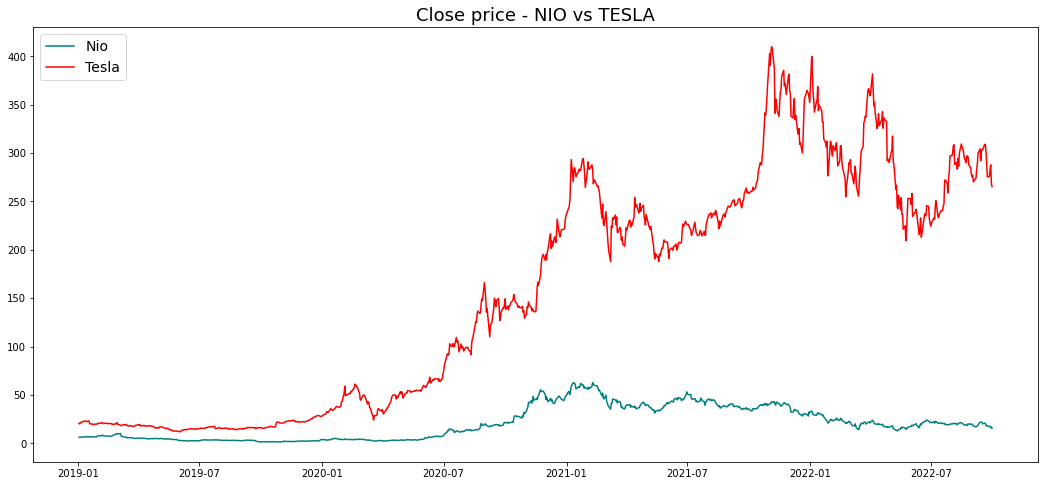

In [3]:
# Seria preturilor de inchidere

plt.figure(figsize=(18,8))
plt.title("Close price - NIO vs TESLA", fontsize=18)
plt.plot(data['NIO']['Close'], label='Nio', color = 'teal')
plt.plot(data['TSLA']['Close'], label='Tesla', color = 'red')
plt.legend(loc='upper left', fontsize=14)
plt.show()

# Simple and log returns

In [4]:
# Calcularea randamentelor simple si logaritmate

# NIO
close_NIO = data["NIO"]["Close"]
simple_return_NIO = close_NIO.pct_change()
log_return_NIO = np.log(1+simple_return_NIO)

# TESLA
close_TSLA = data["TSLA"]["Close"]
simple_return_TSLA = close_TSLA.pct_change()
log_return_TSLA = np.log(1+simple_return_TSLA)

# Simple returns

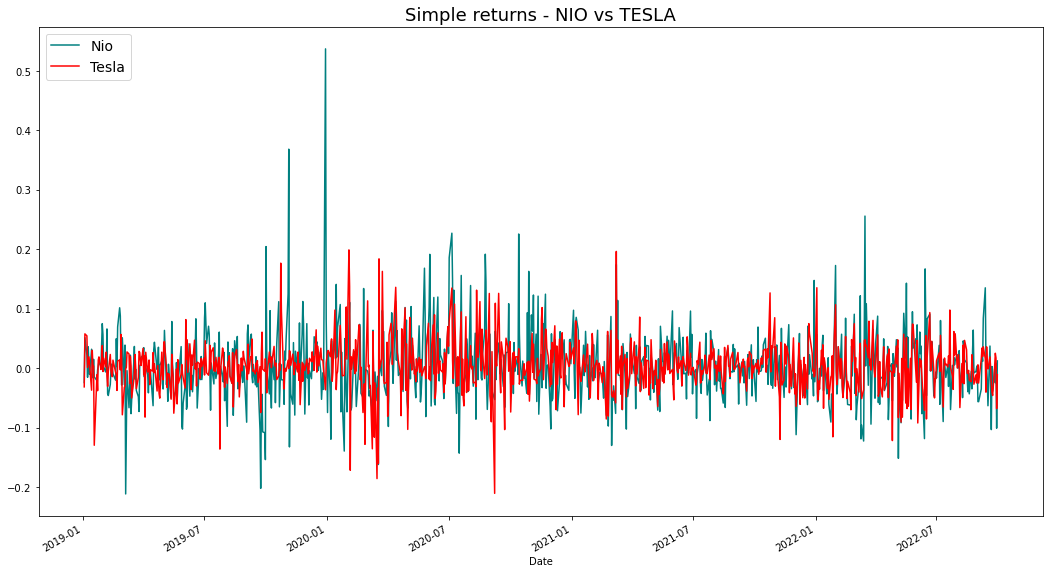

In [16]:
# Seria randamentelor simple

simple_return_NIO.plot(label = "Nio", color = 'teal')
simple_return_TSLA.plot(label = "Tesla", color = 'red')

plt.rcParams["figure.figsize"] = (18, 10)
plt.title("Simple returns - NIO vs TESLA", fontsize=18)
plt.xlabel('Date')
plt.legend(loc='upper left', fontsize=14)

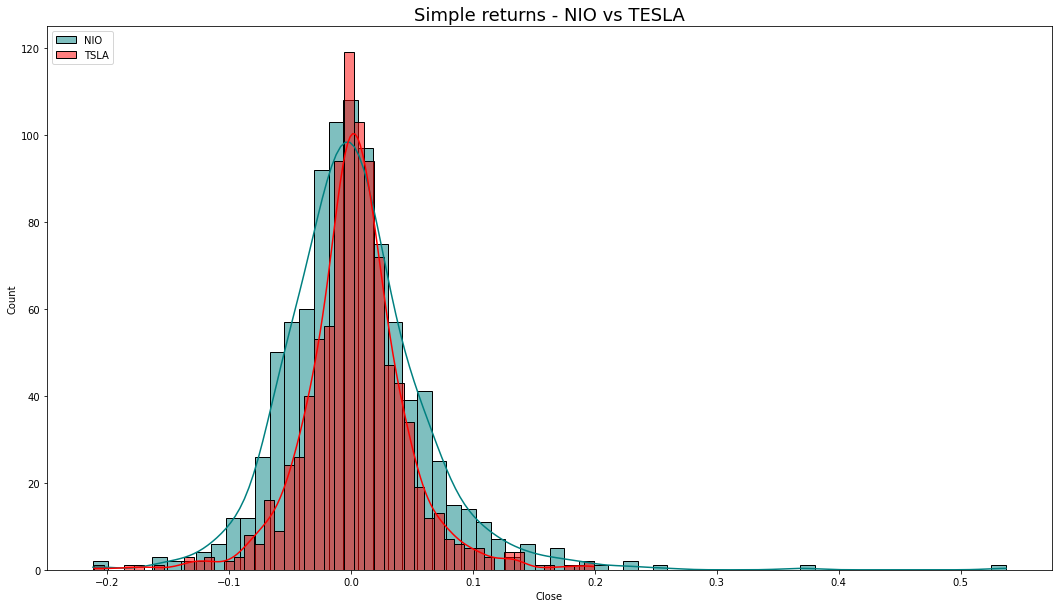

In [6]:
# Histograma randamentelor simple

plt.title("Simple returns - NIO vs TESLA", fontsize=18)
sns.histplot(simple_return_NIO, kde=True, label='NIO', color='teal')  
sns.histplot(simple_return_TSLA, kde=True, label='TSLA', color='red')  
plt.legend(loc='upper left')
plt.show()

In [7]:
# Analiza sumara a randamentelor simple (Nio)

simple_return_NIO.describe()

count    944.000000
mean       0.002619
std        0.058378
min       -0.211614
25%       -0.030439
50%       -0.001450
75%        0.029560
max        0.537190
Name: Close, dtype: float64

In [8]:
# Analiza sumara a randamentelor simple (Tesla)

simple_return_TSLA.describe()

count    944.000000
mean       0.003590
std        0.042062
min       -0.210628
25%       -0.017372
50%        0.002538
75%        0.023165
max        0.198949
Name: Close, dtype: float64

# Log Returns

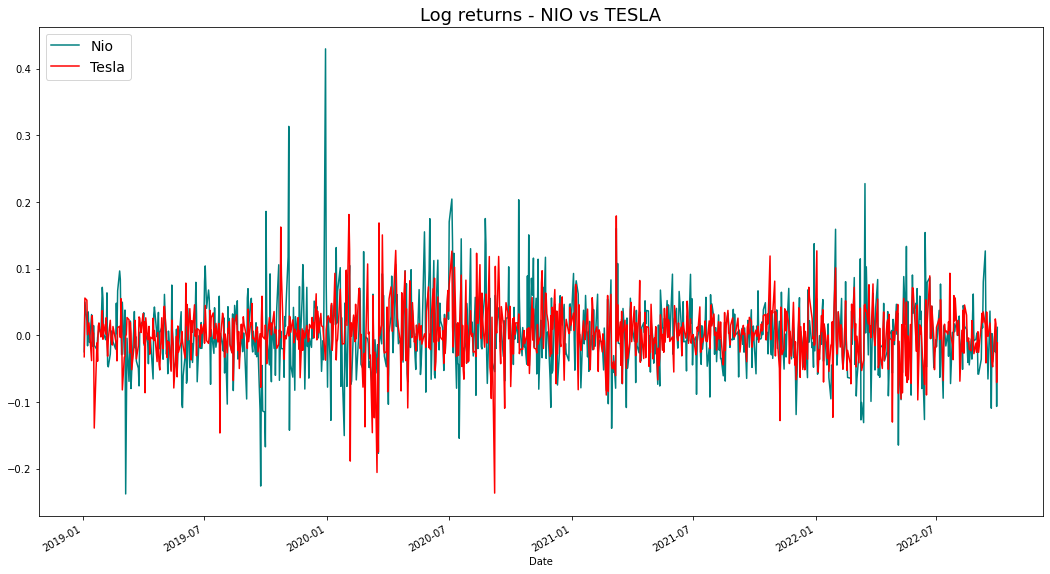

In [9]:
# Seria randamentelor logaritmate

log_return_NIO.plot(label = "Nio", color = 'teal')
log_return_TSLA.plot(label = "Tesla", color = 'red')

plt.rcParams["figure.figsize"] = (18, 10)
plt.title("Log returns - NIO vs TESLA", fontsize=18)
plt.xlabel('Date')
plt.legend(loc='upper left', fontsize=14)

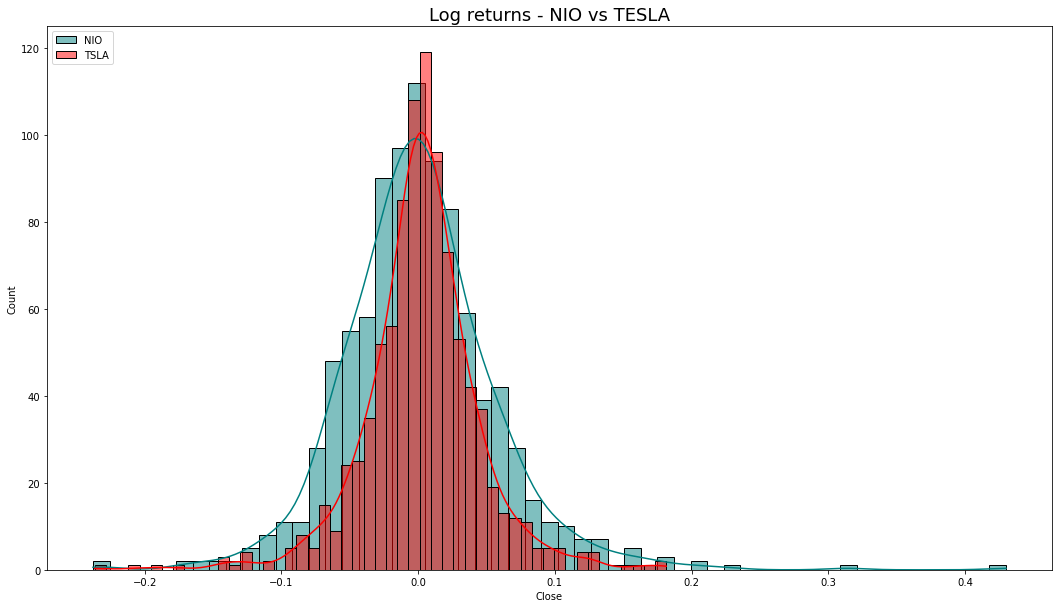

In [10]:
# Histograma randamentelor logaritmate

plt.title("Log returns - NIO vs TESLA", fontsize=18)
sns.histplot(log_return_NIO, kde=True, label='NIO', color='teal')  
sns.histplot(log_return_TSLA, kde=True, label='TSLA', color='red')  
plt.legend(loc='upper left')
plt.show()

In [11]:
# Analiza sumara a randamentelor logaritmate (Nio)

log_return_NIO.describe()

count    944.000000
mean       0.000989
std        0.056606
min       -0.237768
25%       -0.030912
50%       -0.001451
75%        0.029131
max        0.429956
Name: Close, dtype: float64

In [12]:
# Analiza sumara a randamentelor logaritmate (Tesla)

log_return_TSLA.describe()

count    944.000000
mean       0.002703
std        0.042050
min       -0.236518
25%       -0.017524
50%        0.002535
75%        0.022900
max        0.181445
Name: Close, dtype: float64

In [13]:
# Construim o functie pentru a stabili gradul de aplatizare si de asimetrie a distributiei

def skewkurt(data, symbol):
    # symbol
    print(symbol)
    # skew
    if skew(data) < -0.05:
        a = 'left-skewed'
    elif skew(data) > 0.05:
        a = 'right-skewed'
    else:
        a = 'almost normally'
    # kurtosis
    if kurtosis(data) < 0.05:
        b = 'platykurtic'
    elif kurtosis(data) > 0.05:
        b = 'leptokurtic'
    else:
        b = 'mesokurtic'
    # interpretation
    print('skew = ' + str(round(skew(data),2)))
    print('kurtosis = ' + str(round(kurtosis(data),2)))
    print('The distribution for ' + symbol + ' is ' + a + ' and ' + b)

In [14]:
# Aplicam functia creata (Nio)

skewkurt(data["NIO"]["Close"],'Nio')

Nio
skew = 0.56
kurtosis = -0.93
The distribution for Nio is right-skewed and platykurtic


In [15]:
# Aplicam functia creata (Tesla)

skewkurt(data["TSLA"]["Close"],'Tesla')

Tesla
skew = 0.14
kurtosis = -1.44
The distribution for Tesla is right-skewed and platykurtic
